# Ejercicio 17

Usando los siguientes datos:

https://vincentarelbundock.github.io/Rdatasets/doc/ISLR/Default.html

https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv

Reproduzca las siguientes Figuras del texto guia:

Figura 4.1.
Panel derecho Figura 4.2.
Figura 4.3.
Haga los ajustes usando scikit-learn http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

(segunda parte)

Divida los datos anteriores en training y test. Calcule la matriz de confusión para esos dos conjuntos de datos. Diría que estos resultados son buenos para predecir Default?

Usando los siguientes datos: https://vincentarelbundock.github.io/Rdatasets/doc/ISLR/Smarket.html https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Smarket.csv

Dividida también los datos en training y test, en training van todos los datos hasta el año 2004, en test van los demás. Use la regresión logística para predecir Direction en función de las demás variables. Calcule la matriz de confusión para esos dos conjuntos de datos. Diría que estos resultados son buenos para predecir Direction?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model

In [2]:
datos=pd.read_csv("Default.csv")
def matriz_confusion_1(prediccion,Y):
    v_p=0
    v_n=0
    f_p=0
    f_n=0
    for i in range(len(prediccion)):
        if prediccion[i]=="Yes" and Y[i]=="Yes":
            v_p +=1
        if prediccion[i]=="Yes" and Y[i]=="No":
            f_p +=1
        if prediccion[i]=="No" and Y[i]=="Yes":
            f_n +=1
        if prediccion[i]=="No" and Y[i]=="No":
            v_n +=1
    return np.array([[v_p,f_p],[f_n,v_n]])
def matriz_confusion_2(prediccion,Y):
    v_p=0
    v_n=0
    f_p=0
    f_n=0
    for i in range(len(prediccion)):
        if prediccion[i]=="Up" and Y[i]=="Up":
            v_p +=1
        if prediccion[i]=="Up" and Y[i]=="Down":
            f_p +=1
        if prediccion[i]=="Down" and Y[i]=="Up":
            f_n +=1
        if prediccion[i]=="Down" and Y[i]=="Down":
            v_n +=1
    return np.array([[v_p,f_p],[f_n,v_n]])

In [4]:
X, Y =np.array( datos["balance"].values.reshape(-1,1)),np.array(datos["default"])
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

In [5]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train,Y_train)
prob=clf.predict(X_train)
print(matriz_confusion_1(prob,Y_train))

[[  49   28]
 [ 124 4799]]


In [6]:
prob=clf.predict(X_validation)
print(matriz_confusion_1(prob,Y_validation))

[[  50   11]
 [ 110 4829]]


Como los elementos de la diagonal son más grandes que los de fuera de la digonal, podemos decir que tanto para "test" como para "validation" se tiene que si es un buen modelo para predecir "Default" en función de "Balance" 

# Segunda Parte

In [7]:
datos_2=pd.read_csv("Smarket.csv")

In [8]:
X=np.array(datos_2[["Lag1","Lag2","Lag3","Lag4","Lag5","Volume"]])
Y=np.array(datos_2["Direction"])
a=np.array(datos_2["Year"]<=2004)

In [9]:
X_train,X_test,Y_train,Y_test=X[a],X[~a],Y[a],Y[~a]
clf_2 = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train,Y_train)
prob_2=clf_2.predict(X_train)
print(matriz_confusion_2(prob_2,Y_train))

[[349 316]
 [158 175]]


In [10]:
prob_2=clf_2.predict(X_test)
print(matriz_confusion_2(prob_2,Y_test))

[[48 37]
 [93 74]]


Como los terminos fuera de la diagonal son más grandes que los que están en la diagonal, se concluye que no es un buen modelo.

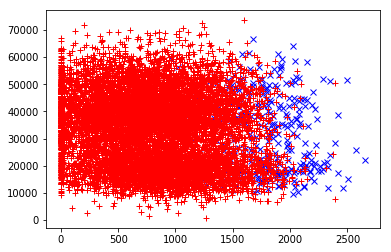

In [12]:
a =np.array(datos["default"]=="Yes")
Balance_y,Income_y= np.array(datos["balance"]),np.array(datos["income"])
Balance_y,Income_y=Balance_y[a],Income_y[a]
a =np.array(datos["default"]=="No")
Balance_n,Income_n= np.array(datos["balance"]),np.array(datos["income"])
Balance_n,Income_n=Balance_n[a],Income_n[a]
# plt.plot(Balance_n,Income_n,marker="x",color="orangered")
# plt.plot(Balance_y,Income_y,marker="+",color="navy")
plt.plot(Balance_y,Income_y,"xb")
plt.plot(Balance_n,Income_n,"+r")
plt.show()

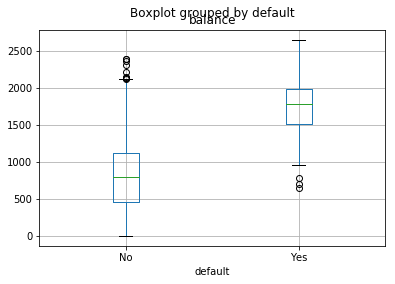

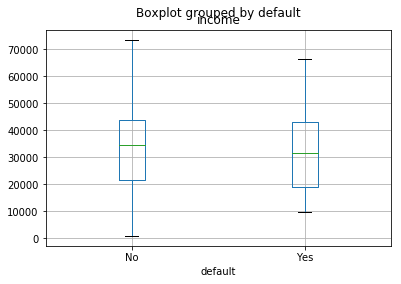

In [13]:
datos.boxplot(column='balance', by="default")
plt.show()
datos.boxplot(column='income', by="default")
plt.show()

In [14]:
X, Y =np.array( datos["balance"].values.reshape(-1,1)),np.array(datos["default"])
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X,Y)
prob=clf.predict_proba(X)

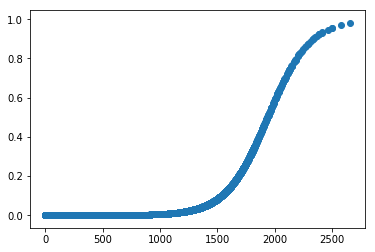

In [17]:
plt.scatter(datos["balance"],prob[:,1])
plt.show()